In [1]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [3]:
# Upload the sample data
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)
df_all = pd.read_csv('../data/cleaned_sample_all_seyferts.csv', index_col=0)

In [5]:
# Set the bin edges
lx_bins = np.array([40, 41, 42, 42.5, 43., 43.5, 44., 44.5, 45., 46.])

In [7]:
# Set the broad H-alpha vs. X-ray relationship
slope = 1.08696315422
intercept = -5.32337221386
scatter = 0.426652787716

# Set how far below the broad H-alpha vs. X-ray relationship to choose Sy 1.9 AGN
offset = 2*scatter

In [16]:
# Pull out the Sy 1.9 that are offset
ind_sy1_9 = df['Type'] == 1.9
halpha_predict_sy1_9 = np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1_9])*slope + intercept
diff_halpha = halpha_predict_sy1_9 - np.log10(df['Broad Halpha Luminosity'][ind_sy1_9])
off_srcs = diff_halpha > 2*scatter
on_srcs = diff_halpha < 2*scatter

In [23]:
# Count the total number of AGN and offset Sy 1.9 in each Lx bin
n_total = np.zeros(len(lx_bins)-1)
n_broad = np.zeros(len(lx_bins)-1)
n_sy1_9 = np.zeros(len(lx_bins)-1)

for i in range(len(n_total)):
    
    ind_total = ((np.log10(df_all['Intrinsic X-ray Luminosity']) > lx_bins[i]) &
                 (np.log10(df_all['Intrinsic X-ray Luminosity']) < lx_bins[i+1]))
    n_total[i] = sum(ind_total)
    ind_offset = ((np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1_9][off_srcs]) > lx_bins[i]) &
                  (np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1_9][off_srcs]) < lx_bins[i+1]))
    n_sy1_9[i] = sum(ind_offset)
    ind_broad = ((np.log10(df['Intrinsic X-ray Luminosity']) > lx_bins[i]) &
                  (np.log10(df['Intrinsic X-ray Luminosity']) < lx_bins[i+1]))
    n_broad[i] = sum(ind_broad)
    
    print 'log(LX) =',lx_bins[i],'-',lx_bins[i+1],': Ntotal =',n_total[i],', Noff =', n_sy1_9[i],', Nbroad =', n_broad[i]

log(LX) = 40.0 - 41.0 : Ntotal = 2.0 , Noff = 0.0 , Nbroad = 1.0
log(LX) = 41.0 - 42.0 : Ntotal = 10.0 , Noff = 1.0 , Nbroad = 7.0
log(LX) = 42.0 - 42.5 : Ntotal = 18.0 , Noff = 3.0 , Nbroad = 7.0
log(LX) = 42.5 - 43.0 : Ntotal = 44.0 , Noff = 2.0 , Nbroad = 21.0
log(LX) = 43.0 - 43.5 : Ntotal = 125.0 , Noff = 9.0 , Nbroad = 65.0
log(LX) = 43.5 - 44.0 : Ntotal = 160.0 , Noff = 14.0 , Nbroad = 88.0
log(LX) = 44.0 - 44.5 : Ntotal = 129.0 , Noff = 2.0 , Nbroad = 67.0
log(LX) = 44.5 - 45.0 : Ntotal = 67.0 , Noff = 5.0 , Nbroad = 44.0
log(LX) = 45.0 - 46.0 : Ntotal = 22.0 , Noff = 2.0 , Nbroad = 11.0


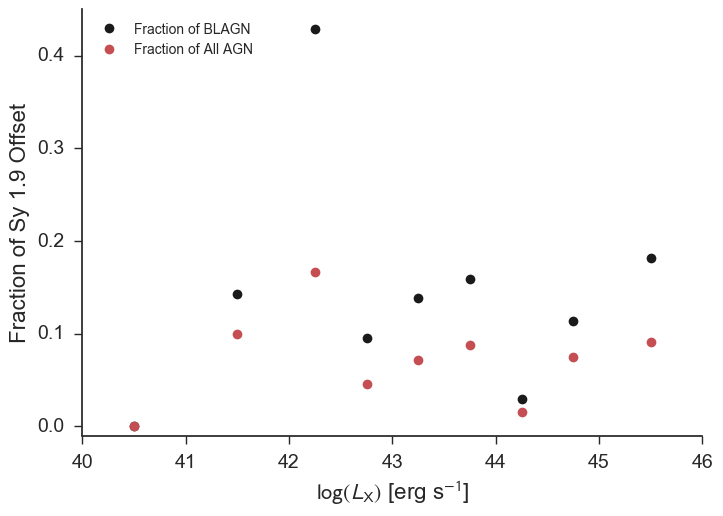

In [27]:
# Plot the fraction of offset sources
fig = plt.figure()
ax = fig.add_subplot(111)

bin_centers = (lx_bins[1:]+lx_bins[0:-1])/2.

ax.plot(bin_centers, n_sy1_9/n_broad, 'ko')
ax.plot(bin_centers, n_sy1_9/n_total, 'ro')
ax.set_xlabel(r'$\log(L_{\rm X})$ [erg s$^{-1}$]')
ax.set_ylabel('Fraction of Sy 1.9 Offset')
ax.set_ylim(-0.01, ax.get_ylim()[1])
ax.legend(['Fraction of BLAGN', 'Fraction of All AGN'], loc='upper left', fontsize=10)
sn.despine()